In [298]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import tensorflow as tf
import seaborn as sns


### Read the data from github repository and drop uniqe values from it, also combining colunms which are related each other

In [299]:
url = 'https://raw.githubusercontent.com/AtesBurak1/Ceng-474-Final/main/smoking.csv'
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
##missing_count = df.isna().sum()  0
##print(missing_count)   0

#No need id because it is unique to everyone
df = df.sort_values(by = 'ID')
df = df.drop(['ID'], axis = 1)
## No need for oral column since every value is 1
df = df.drop(['oral'], axis = 1)

## Encode
df['gender'] = df['gender'].replace({'F': 0, 'M': 1})
df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0})
## Combine left and right eyesight and hearing



### Fix the blind values for eyesight, then combine eyesight

In [300]:
columns_to_replace = ['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df[columns_to_replace] = df[columns_to_replace].replace(9.9, 0)

df['eyesight'] = df[['eyesight(left)', 'eyesight(right)']].mean(axis=1)
df['hearing'] = df[['hearing(left)', 'hearing(right)']].mean(axis=1)
df = df.drop(['eyesight(left)', 'eyesight(right)','hearing(left)', 'hearing(right)'],axis = 1)

In [301]:
#Describe data to look is there any outlayer values
df.describe()

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,eyesight,hearing
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.635657,44.182917,164.649321,65.864936,82.046418,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.555556,0.367288,0.993679,1.025865
std,0.481250,12.071418,9.194597,12.820306,9.274223,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.496908,0.482070,0.301393,0.137929
min,0.000000,20.000000,130.000000,30.000000,51.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000,0.800000,1.000000
50%,1.000000,40.000000,165.000000,65.000000,82.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000,1.000000,1.200000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000,1.000000,2.000000,2.000000


### Pieplot

<AxesSubplot: ylabel='gender'>

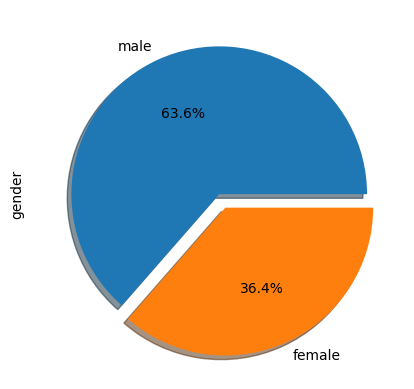

In [302]:
# The pie plot refenced from here -> https://www.kaggle.com/code/abdalrahmanshahrour/predict-smoking-status-accuracy-99-2-93-6
df['gender'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["male","female"], shadow=True)


<AxesSubplot: ylabel='smoking'>

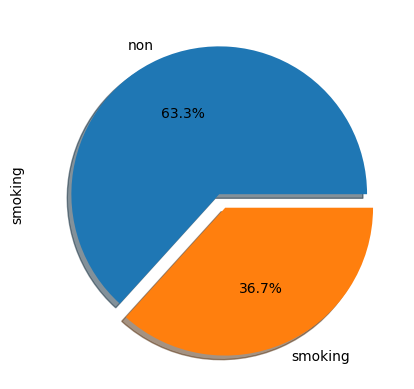

In [303]:

df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

## CatPlot

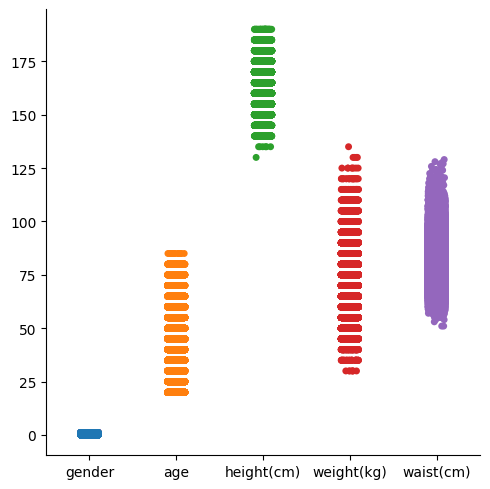

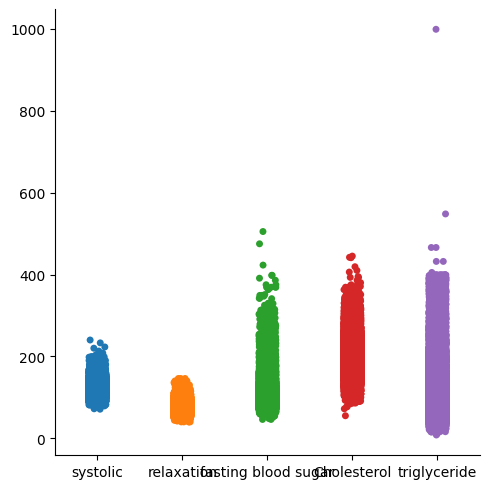

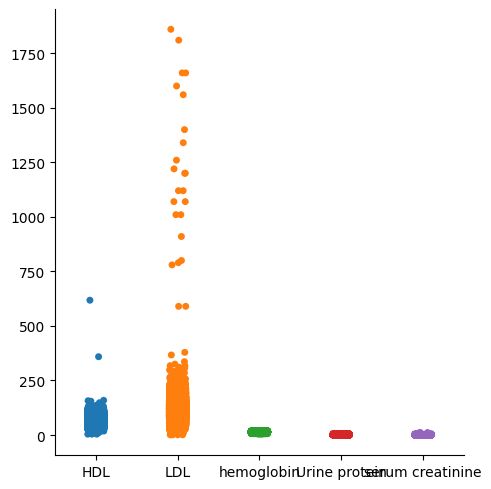

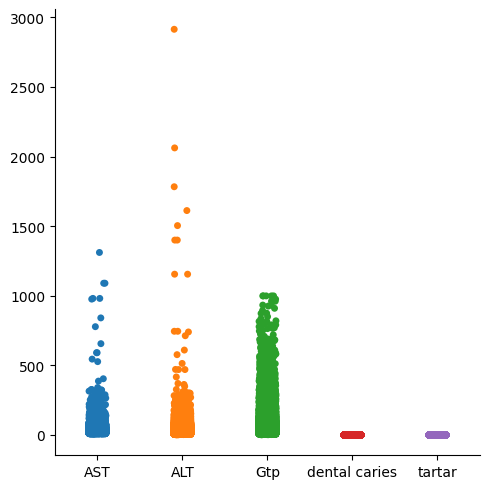

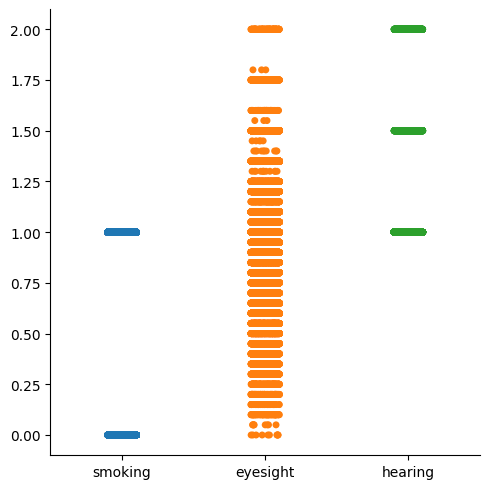

In [304]:
#CatPlots
sns.catplot(df.iloc[:, 0:5])
sns.catplot(df.iloc[:, 5:10])
sns.catplot(df.iloc[:, 10:15])
sns.catplot(df.iloc[:, 15:20])
sns.catplot(df.iloc[:, 20:23])

## BoxPlot

<AxesSubplot: xlabel='gender'>

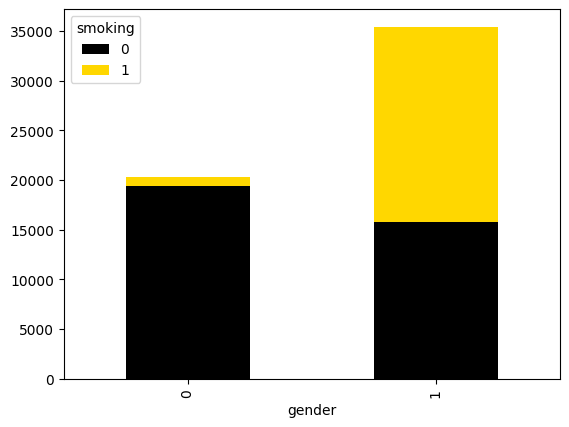

In [305]:
#BoxPlot
smoker_counts = pd.crosstab(index=[df['gender']], columns=df['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )


## HeatMap

<AxesSubplot: >

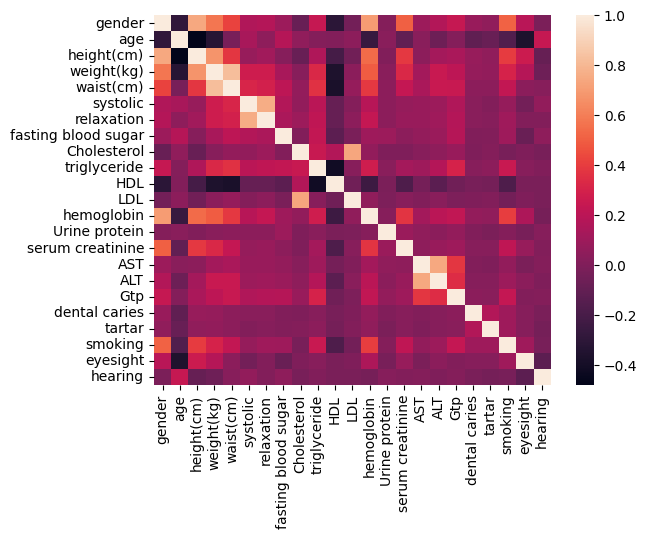

In [306]:
#HeatMap
corelation=df.corr()
sns.heatmap(corelation)

#Get rid of outlayer

In [307]:
# Make max values like this beacuse of outlayers still exist and we cant delete all of them, there could be too much data loss  got the values from https://www.kaggle.com/code/m000sey/ps-3-24-boosting-ensemble-w-nn
df['Gtp'] = np.clip(df['Gtp'], 0, 300)
df['LDL'] = np.clip(df['LDL'], 0, 250)
df['ALT'] = np.clip(df['ALT'], 0, 150)
df['AST'] = np.clip(df['AST'], 0, 100)
df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 2)
df['fasting blood sugar'] = np.clip(df['fasting blood sugar'], 0, 175)
df['triglyceride'] = np.clip(df['triglyceride'], 0, 400)
df['hemoglobin'] = np.clip(df['hemoglobin'], 8, 20)

In [308]:
temp_df = df.copy()
def split_data():
  rows_for_test = []

  test_zero_label = (temp_df['smoking'] == 0).sum()
  test_one_label = df.shape[0] - test_zero_label
  print(test_one_label, test_zero_label)
  test_zero_label = test_zero_label - test_one_label

  counter_0 = int(test_zero_label/128)
  count = 0
  count1 = 0
  print(counter_0)
  index_0 = 0
  index_1 = 0
  quarter_for_0 = 1
  quarter_for_1 = 1
  lenght = temp_df.shape[0]
  j = 1
  while (quarter_for_0 != 128) and (index_0 < lenght):
      if index_0 < lenght:
         row_0 = temp_df.iloc[[index_0]]
         if row_0['smoking'].iloc[0] == 0 and counter_0 > 0 and row_0['gender'].iloc[0] == 1:
           rows_for_test.append(index_0)
           counter_0 -= 1
           count +=1

      if counter_0 == 0:
         counter_0 = int(test_zero_label/128)
         index_0 = int(lenght/128 * quarter_for_0)
         quarter_for_0 += 1

      index_0+=1
  rows_to_move = temp_df.iloc[rows_for_test]
  
  # Deleting the extracted rows from temp_df
  train = temp_df.drop(temp_df.index[rows_for_test])
  
  return train

new_df = split_data()
Y = new_df['smoking']
X = new_df.drop(['smoking'], axis=1)
scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X))
scaler2 = MinMaxScaler()
X_min_max = pd.DataFrame(scaler2.fit_transform(X))

20455 35237
115


In [309]:
X_standard.describe() #Now we have more stable values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04,4.123100e+04
mean,-7.703248e-17,7.349967e-17,3.722375e-17,3.877474e-18,8.567493e-16,9.960799e-17,-5.506874e-16,-2.956358e-16,3.175866e-16,4.945933e-17,1.438974e-16,5.333680e-17,-2.491923e-16,1.271381e-16,-2.757315e-17,1.155487e-16,3.205378e-17,8.121153e-18,1.320495e-17,1.121021e-16,-1.278705e-16,1.756065e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.015866e+00,-2.254424e+00,-3.515484e+00,-2.646349e+00,-3.178729e+00,-3.596113e+00,-3.661845e+00,-3.101792e+00,-3.915139e+00,-1.641394e+00,-3.584221e+00,-3.358211e+00,-3.912499e+00,-2.143174e-01,-3.977328e+00,-1.686309e+00,-1.314640e+00,-9.055798e-01,-5.272243e-01,-1.143756e+00,-3.265734e+00,-1.853778e-01
25%,-1.015866e+00,-4.545778e-01,-8.448328e-01,-6.977463e-01,-7.468562e-01,-7.094391e-01,-5.818924e-01,-5.688318e-01,-6.857459e-01,-7.323925e-01,-7.452456e-01,-6.969250e-01,-6.552176e-01,-2.143174e-01,-7.931024e-01,-5.544864e-01,-5.601184e-01,-5.468065e-01,-5.272243e-01,-1.143756e+00,-5.986518e-01,-1.853778e-01
50%,9.843814e-01,-4.616278e-03,2.234276e-01,-3.080258e-01,-6.721087e-03,-5.993746e-02,3.409802e-02,-2.153955e-01,-5.628802e-02,-2.778918e-01,-1.510414e-01,-4.638832e-02,2.082192e-02,-2.143174e-01,-2.623981e-01,-2.062334e-01,-2.906464e-01,-3.315426e-01,-5.272243e-01,8.743120e-01,6.811875e-02,-1.853778e-01
75%,9.843814e-01,8.953069e-01,7.575578e-01,4.714152e-01,6.276804e-01,6.617310e-01,5.474234e-01,3.147590e-01,6.279054e-01,4.658366e-01,5.752081e-01,6.337182e-01,7.583196e-01,-2.143174e-01,7.990104e-01,2.290829e-01,1.944034e-01,1.229035e-01,-5.272243e-01,8.743120e-01,7.348893e-01,-1.853778e-01
max,9.843814e-01,3.595076e+00,2.894079e+00,5.537782e+00,5.068491e+00,8.094916e+00,7.220653e+00,4.497089e+00,6.758278e+00,3.757523e+00,3.695371e+01,4.004681e+00,3.462478e+00,1.209967e+01,6.106053e+00,6.497638e+00,6.715628e+00,6.245966e+00,1.896726e+00,8.743120e-01,3.401971e+00,7.210183e+00


### Scaled CatPlot


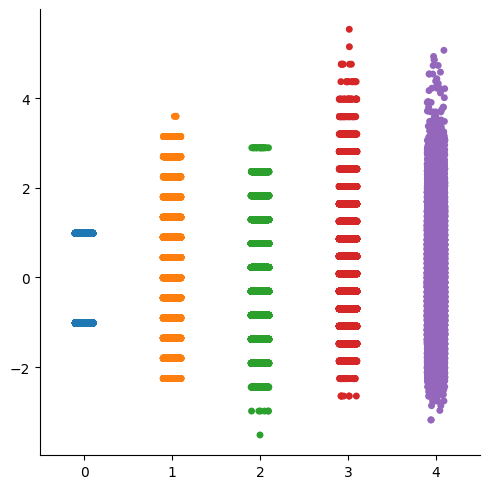

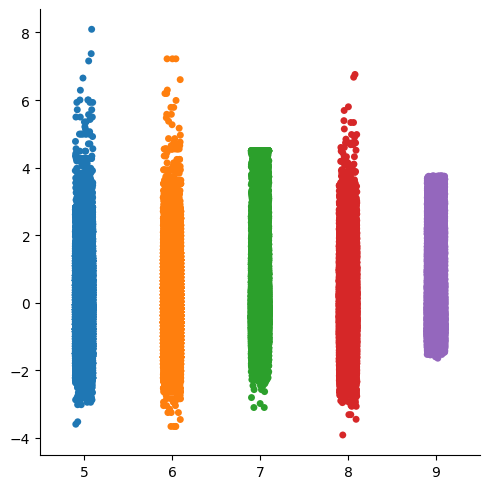

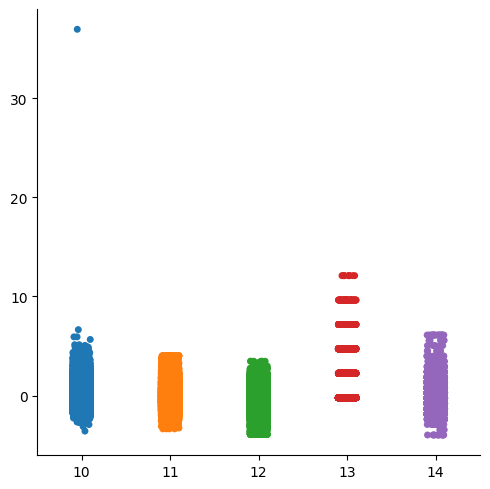

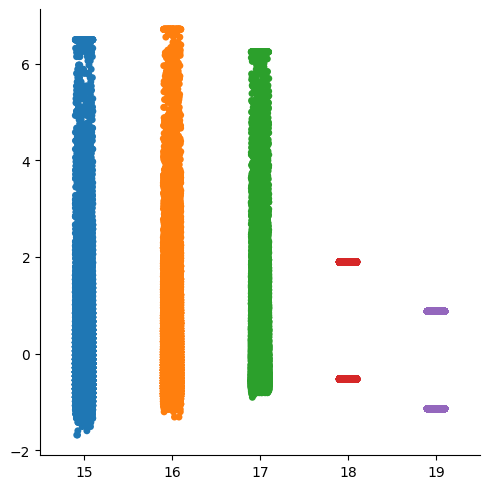

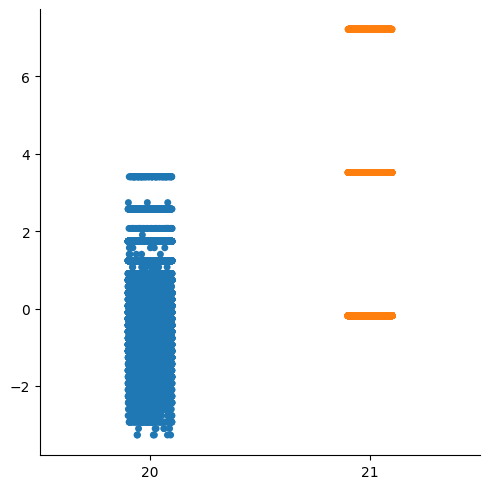

In [310]:
#CatPlot
#CatPlots
sns.catplot(X_standard.iloc[:, 0:5])
sns.catplot(X_standard.iloc[:, 5:10])
sns.catplot(X_standard.iloc[:, 10:15])
sns.catplot(X_standard.iloc[:, 15:20])
sns.catplot(X_standard.iloc[:, 20:22])

### Scaled BoxPlot


In [311]:
#BoxPlot
print(X,Y,X_standard)
smoker_counts = pd.crosstab(index=[X['gender']], columns=Y['smoking'], margins=True)

smoker_counts.iloc[:-1, :-1].plot(kind='bar', stacked=True, color=['black', 'gold'], grid=False, )


       gender  age  height(cm)  weight(kg)  waist(cm)  systolic  relaxation  \
0           0   40         155          60       81.3     114.0        73.0   
1           0   40         160          60       81.0     119.0        70.0   
2           1   55         170          60       80.0     138.0        86.0   
4           0   40         155          60       86.0     120.0        74.0   
6           1   40         160          60       85.5     116.0        82.0   
...       ...  ...         ...         ...        ...       ...         ...   
44549       1   35         175          70       84.0     105.0        74.0   
44550       1   35         175          70       70.9     116.0        70.0   
44551       1   50         165          90      106.8     122.0        75.0   
44552       1   25         175          80       93.2     124.0        76.0   
55691       1   55         160          65       85.0     124.0        75.0   

       fasting blood sugar  Cholesterol  triglyceri

KeyError: 'smoking'

### Scaled HeatMap

<AxesSubplot: >

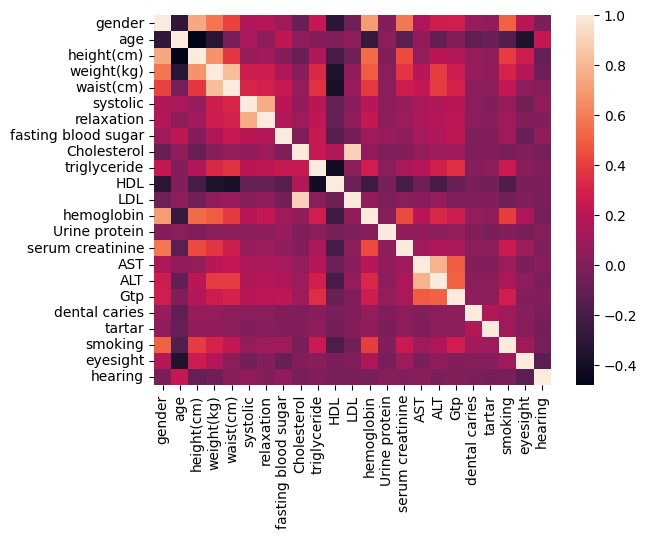

In [312]:
#HeatMap
########################################DÜZELTİECEK
corelation=df.corr()
sns.heatmap(corelation)

### Split the dataframe as X (features) and Y(outcomes), also convert it to cuDF for using cuML Random Forest Classifier

<AxesSubplot: ylabel='smoking'>

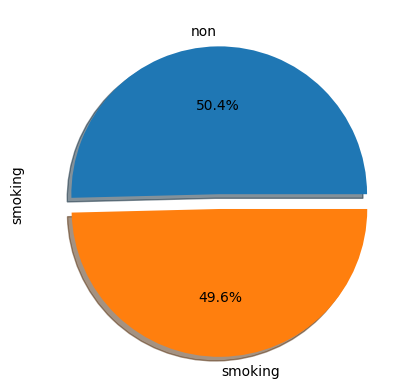

In [313]:

new_df['smoking'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","smoking"], shadow=True)

# FEATURE SELECTION

### Lasso

In [314]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


# Lets find how many features are needed using a loop and 5 different feature selection method
feature_count = 12 # will go to 8
RFC = RandomForestClassifier(n_estimators=50)
model_list = {
    'Logistic': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'chi2': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Lasso': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'mutual': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'RFC': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'KNN': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Stacking': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Max_voting': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0},
    'Deep_learning': {"f1": 0, "precision": 0, "recall": 0, "roc_auc": 0, "feature_count": 0}
}

for key in model_list:
    model_list[key]['accuracy'] = 0
#Only lasso is applied once
lasso = Lasso(alpha=0.0001)
lasso.fit(X_standard, Y)

# Get feature which does not have coeffient 0
selected_features = X_standard.columns[lasso.coef_ != 0]
X_lasso = X_standard[selected_features]
X_train_lasso, X_test_lasso, y_train_lasoo, y_test_lasso = train_test_split(X_lasso, Y, test_size=0.2, random_state=42)
RFC.fit(X_train_lasso, y_train_lasoo)


y_pred_lasso = RFC.predict(X_test_lasso)


precision = precision_score(y_test_lasso, y_pred_lasso)
recall = recall_score(y_test_lasso, y_pred_lasso)
f1 = f1_score(y_test_lasso, y_pred_lasso)

roc_auc = roc_auc_score(y_test_lasso, y_pred_lasso)
accuracy = accuracy_score(y_test_lasso, y_pred_lasso)

# Assign these values to the model dictionary
model_list['Lasso']['precision'] = precision
model_list['Lasso']['recall'] = recall
model_list['Lasso']['f1_score'] = f1
model_list['Lasso']['feature_count'] = X_lasso.shape[1]
model_list['Lasso']['roc_auc'] = roc_auc
model_list['Lasso']['accuracy'] = accuracy

In [315]:
model_list['Lasso']['accuracy']

0.9506487207469383

### Chi2 and mutual_info with SelectKBest

In [316]:
def RFC_train_test_SelectKBest(method, feature_count, X, Y):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, precision, recall, roc_auc,accuracy


feature_count = 21
while feature_count > 15:
    chi_f1, chi_precision, chi_recall, chi_roc_auc, chi_acc = RFC_train_test_SelectKBest(chi2, feature_count, X_min_max, Y)
    mutual_f1, mutual_precision, mutual_recall, mutual_roc_auc, mutual_acc = RFC_train_test_SelectKBest(mutual_info_classif, feature_count, X, Y)

    if chi_acc > model_list['chi2']['accuracy']:
        model_list['chi2']['f1'] = chi_f1
        model_list['chi2']['precision'] = chi_precision
        model_list['chi2']['recall'] = chi_recall
        model_list['chi2']['feature_count'] = feature_count
        model_list['chi2']['roc_auc'] = chi_roc_auc
        model_list['chi2']['accuracy'] = chi_acc

    if mutual_acc > model_list['mutual']['accuracy']:
        model_list['mutual']['f1'] = mutual_f1
        model_list['mutual']['precision'] = mutual_precision
        model_list['mutual']['recall'] = mutual_recall
        model_list['mutual']['feature_count'] = feature_count
        model_list['mutual']['roc_auc'] = mutual_roc_auc
        model_list['mutual']['accuracy'] = mutual_acc
    feature_count -= 1


## Decision Tree

In [317]:
#Decision TREE

### RFC

In [318]:

def RFC_train_test_RFC(X, Y, feature_count):
    RFC.fit(X, Y)

    # Access feature importances
    feature_importances = RFC.feature_importances_

    # Sort the features
    sorted_feature_indices = feature_importances.argsort()[::-1]

    selected_feature_indices = sorted_feature_indices[:feature_count]

    # Select specified features within cuDF
    X_selected = X_standard.iloc[:, selected_feature_indices]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    return f1, precision, recall, roc_auc, accuracy

feature_count = 15
while feature_count < 20:
    RFC_f1, RFC_precision, RFC_recall, RFC_roc_auc, RFC_accuracy = RFC_train_test_RFC(X_standard, Y, feature_count)
    if RFC_accuracy > model_list['RFC']['accuracy']:
        model_list['RFC']['f1'] = RFC_f1
        model_list['RFC']['precision'] = RFC_precision
        model_list['RFC']['recall'] = RFC_recall
        model_list['RFC']['feature_count'] = feature_count
        model_list['RFC']['roc_auc'] = RFC_roc_auc
        model_list['RFC']['accuracy'] = RFC_accuracy
    feature_count += 1


In [319]:
def logistic_chi(method, feature_count, X, Y, LR):
    k_best = SelectKBest(score_func=method, k=feature_count)
    X_selected = k_best.fit_transform(X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1, precision, recall, roc_auc,accuracy

### Logisctic Reggression

In [322]:
#Logistic Regression Here
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
Logistic_model = LogisticRegression(random_state=42,max_iter=10000)



feature_count = 21
while feature_count > 15:
    lr_f1, lr_precision, lr_recall, lr_roc_auc, lr_accuracy = logistic_chi(chi2, feature_count, X_min_max, Y,Logistic_model)
    if lr_accuracy > model_list['Logistic']['accuracy']:
        model_list['Logistic']['f1'] = lr_f1
        model_list['Logistic']['precision'] = lr_precision
        model_list['Logistic']['recall'] = lr_recall
        model_list['Logistic']['feature_count'] = feature_count
        model_list['Logistic']['roc_auc'] = lr_roc_auc
        model_list['Logistic']['accuracy'] = lr_accuracy
    feature_count -= 1

# Display the results
print(f'Accuracy: {lr_accuracy}')

Accuracy: 0.944343397599127


In [347]:
# chi2 gives best performance at feature numberr 16 so we will use 16 feature end of the code from herek_best = SelectKBest(score_func=method, k=feature_count)
k_best = SelectKBest(score_func=chi2, k=16)
X_standard = k_best.fit_transform(X_min_max, Y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000,41231.000000
mean,0.507870,0.385405,0.548475,0.323351,0.385430,0.336489,0.408191,0.304023,0.530510,0.394444,0.206051,0.163711,0.126627,0.217506,0.566758,0.489784
std,0.499944,0.170957,0.156019,0.122189,0.121254,0.091892,0.131600,0.185225,0.135595,0.099174,0.122192,0.124530,0.139832,0.412555,0.495529,0.149978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.307692,0.416667,0.238095,0.294872,0.283019,0.333333,0.168367,0.441667,0.315789,0.138298,0.093960,0.050167,0.000000,0.000000,0.400000
50%,1.000000,0.384615,0.583333,0.285714,0.384615,0.339623,0.379845,0.252551,0.533333,0.368421,0.180851,0.127517,0.080268,0.000000,1.000000,0.500000
75%,1.000000,0.538462,0.666667,0.380952,0.461538,0.386792,0.449612,0.390306,0.633333,0.473684,0.234043,0.187919,0.143813,0.000000,1.000000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### KNN


In [365]:
#KNN here  
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)    
accuracy_knn = []
for i in range(5,25):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_knn.append(accuracy_score(y_test, pred_i))


  f1 = f1_score(y_test, pred_i)
  precision = precision_score(y_test, pred_i)
  recall = recall_score(y_test, pred_i)
  roc_auc = roc_auc_score(y_test, pred_i)
  accuracy = accuracy_score(y_test, pred_i)


  if accuracy >= model_list['KNN']['accuracy']:
      model_list['KNN']['precision'] = precision
      model_list['KNN']['recall'] = recall
      model_list['KNN']['f1_score'] = f1
      model_list['KNN']['feature_count'] = 16
      model_list['KNN']['roc_auc'] = roc_auc
      model_list['KNN']['accuracy'] = accuracy
      

#Bad result beacuse of imbalanced data here!

13
14
15
16
17
18
19
20
21
22
23
24


### Max voting

In [354]:
#Max voting here
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
LR = LogisticRegression(max_iter=1000)
NB = GaussianNB()

final_model = VotingClassifier( estimators=[ ('dt', DTC ), ('rf', RFC), ('lr', LR), ('gb', GBC),('NB', NB) ])
 
# training all the model on the train dataset
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
f1 = f1_score(y_test, pred_final)
precision = precision_score(y_test, pred_final)
recall = recall_score(y_test, pred_final)
roc_auc = roc_auc_score(y_test, pred_final)
accuracy = accuracy_score(y_test, pred_final)


model_list['Max_voting']['precision'] = precision
model_list['Max_voting']['recall'] = recall
model_list['Max_voting']['f1_score'] = f1
model_list['Max_voting']['feature_count'] = 16
model_list['Max_voting']['roc_auc'] = roc_auc
model_list['Max_voting']['accuracy'] = accuracy
print(accuracy)


0.9447071662422699


### Stacking

In [369]:
#Stacking Here
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
base_models = [
    ('logistic', LogisticRegression(max_iter=500)),
    ('random_forest', RandomForestClassifier(n_estimators=75)),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=75)),
    ('knn', KNeighborsClassifier(n_neighbors=13)),
    ('svm', SVC()), 
    ('adaboost', AdaBoostClassifier(n_estimators=70))  
]

stacked_model = StackingClassifier(estimators = base_models, final_estimator=RandomForestClassifier())
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.2, random_state=42)

# Train the stacking model
stacked_model.fit(x_train, y_train)

# Make predictions
stacked_predictions = stacked_model.predict(x_test)

f1 = f1_score(y_test, stacked_predictions)
precision = precision_score(y_test, stacked_predictions)
recall = recall_score(y_test, stacked_predictions)
roc_auc = roc_auc_score(y_test, stacked_predictions)
accuracy = accuracy_score(y_test, stacked_predictions)


model_list['Stacking']['precision'] = precision
model_list['Stacking']['recall'] = recall
model_list['Stacking']['f1_score'] = f1
model_list['Stacking']['feature_count'] = 16
model_list['Stacking']['roc_auc'] = roc_auc
model_list['Stacking']['accuracy'] = accuracy
print(accuracy)

0.9510124893900812


### Deep Learning

In [356]:
#Deep Learning Here

In [370]:
best_method = None
best_acc = 0

for method, info in model_list.items():
    acc = info['accuracy']
    if acc > best_acc:
        best_method = method
        best_acc = acc
    print(f"{method} has accuracy={info['accuracy']:.4f} roc_auc={info['roc_auc']:.4f}, f1={info['f1']:.4f}, precision={info['precision']:.4f}, recall={info['recall']:.4f}, feature_count={info['feature_count']}")

print(f"The best feature selection method is '{best_method}' with an accuracy of {best_acc:.4f} and feature count {model_list[best_method]['feature_count']}")

Logistic has accuracy=0.9445 roc_auc=0.9445, f1=0.9446, precision=0.9351, recall=0.9543, feature_count=19
chi2 has accuracy=0.9509 roc_auc=0.9510, f1=0.9512, precision=0.9373, recall=0.9655, feature_count=16
Lasso has accuracy=0.9506 roc_auc=0.9508, f1=0.0000, precision=0.9373, recall=0.9650, feature_count=22
mutual has accuracy=0.9508 roc_auc=0.9509, f1=0.9511, precision=0.9373, recall=0.9653, feature_count=20
RFC has accuracy=0.9509 roc_auc=0.9510, f1=0.9512, precision=0.9373, recall=0.9655, feature_count=17
KNN has accuracy=0.9445 roc_auc=0.9445, f1=0.0000, precision=0.9351, recall=0.9543, feature_count=16
Stacking has accuracy=0.9510 roc_auc=0.9511, f1=0.0000, precision=0.9373, recall=0.9658, feature_count=16
Max_voting has accuracy=0.9447 roc_auc=0.9448, f1=0.0000, precision=0.9351, recall=0.9548, feature_count=16
Deep_learning has accuracy=0.0000 roc_auc=0.0000, f1=0.0000, precision=0.0000, recall=0.0000, feature_count=0
The best feature selection method is 'Stacking' with an acc